# Confirming Bifurcation from Trajectories

## Part (a): Saddle-Node Bifurcation ($\dot{x} = r - x^2$)

### Mathematical Derivation
The fixed points are found by setting the growth rate to zero:
$$r - x^2 = 0$$

1. **For $r < 0$**: No fixed points exist. The velocity $\dot{x}$ is always negative, so all trajectories will decrease toward $-\infty$.
2. **For $r = 0$**: A single semi-stable fixed point appears at $x = 0$.
3. **For $r > 0$**: Two fixed points appear:
   * $x^* = +\sqrt{r}$ (Stable Attractor)
   * $x^* = -\sqrt{r}$ (Unstable Repeller)

### Numerical Strategy
We will use Euler's Method:
$$x_{n+1} = x_n + (r - x_n^2) \Delta t$$
To show the bifurcation, we choose initial conditions that "surround" the potential fixed points, such as $x(0) = -2, -0.5, 0.5, 2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

### Plotting dx/dt vs x 

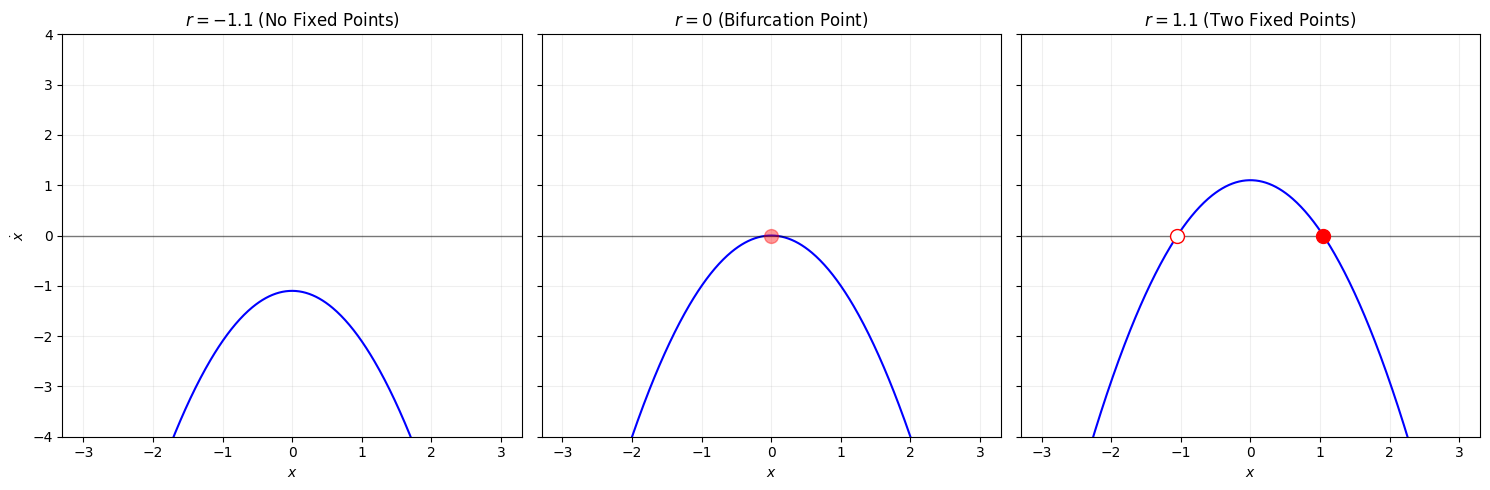

In [2]:
def f_saddle(x, r):
    return r - x**2

x = np.linspace(-3, 3, 500)
r_values = [-1.1, 0, 1.1]
titles = [r'$r = -1.1$ (No Fixed Points)', 
          r'$r = 0$ (Bifurcation Point)', 
          r'$r = 1.1$ (Two Fixed Points)']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, r in enumerate(r_values):
    y = f_saddle(x, r)
    ax = axes[i]
    
    ax.plot(x, y, color='blue', label=f'r = {r}')
    ax.axhline(0, color='black', lw=1, alpha=0.5)
    
    if r > 0:
        # Stable point at +sqrt(r), Unstable at -sqrt(r)
        ax.plot(np.sqrt(r), 0, 'ro', ms=10, label='Stable')
        ax.plot(-np.sqrt(r), 0, 'ro', ms=10, mfc='w', label='Unstable')
    elif r == 0:
        # Collision point
        ax.plot(0, 0, 'ro', ms=10, alpha=0.4, label='Half-stable')
        
    ax.set_title(titles[i])
    ax.set_xlabel('$x$')
    if i == 0: ax.set_ylabel(r'$\dot{x}$')
    ax.grid(alpha=0.2)
    ax.set_ylim(-4, 4)

plt.tight_layout()
plt.show()

In [ ]:
def simulate_saddle_node(r):

    dt = 0.01
    t_max = 10
    t = np.arange(0,t_max,dt)
    initial_conditions = [-2,-0.5,0.5,2]

    plt.figure(figsize=(10,6))

    for x0 in initial_conditions:

        x_values = [x0]
        current_x = x0

        for _ in range(len(t) - 1):
            dx_dt = r - current_x**2
            current_x = current_x + dx_dt*dt

            if current_x < -10:
                current_x = -10
                x_values.append(current_x)
                break

            x_values.append(current_x)

        plt.plot(t[:len(x_values)], x_values, label=f'x(0) = {x0}') 

    if r > 0:
        # Using raw strings r'' to handle LaTeX backslashes correctly
        plt.axhline(y=np.sqrt(r), color='g', ls='--', alpha=0.6, label=r'Stable ($\sqrt{r}$)')
        plt.axhline(y=-np.sqrt(r), color='r', ls='--', alpha=0.6, label=r'Unstable ($-\sqrt{r}$)')
    elif r == 0:
        plt.axhline(y=0, color='black', ls='--', alpha=0.8, label='Bifurcation Point')

    plt.title(fr'Saddle-Node Bifurcation: $\dot{{x}} = {r} - x^2$')
    plt.xlabel('Time (t)')
    plt.ylabel('x(t)')
    plt.ylim(-5, 5)
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.show()

interact(simulate_saddle_node, r=FloatSlider(value=1.1, min=-1.1, max=1.1, step=0.1));

interactive(children=(FloatSlider(value=1.1, description='r', max=1.1, min=-1.1), Output()), _dom_classes=('wi…

### Observations and Conclusion

#### Asymptotic Behavior and Bifurcation
The simulation and phase line analysis reveal three distinct regimes based on the parameter $r$:

1. **For $r > 0$ (Stable and Unstable pair):** 
   * We observe two equilibria. Any trajectory starting above the unstable point $x = -\sqrt{r}$ is "captured" by the vector field and converges to the stable equilibrium $x = \sqrt{r}$.
   * Trajectories starting below $x = -\sqrt{r}$ diverge toward $-\infty$.

2. **For $r = 0$ (The Bifurcation Point):** 
   * The two fixed points collide at the origin. The system becomes **semi-stable**; it is attractive from above but repulsive from below. This represents the critical moment where the "saddle" and "node" merge.

3. **For $r < 0$ (No Fixed Points):** 
   * The fixed points vanish into the complex plane (they are no longer real numbers). 
   * Physically, the "bottleneck" is gone. No matter the initial condition, the velocity $\dot{x}$ is always negative, and all trajectories dive toward $-\infty$.

### Conclusion
This system demonstrates a **Saddle-Node Bifurcation**, which is the basic mechanism for the creation and destruction of fixed points in dynamical systems. As $r$ decreases through zero, the stable and unstable fixed points move toward each other, collide, and annihilate.

---

## Part (b): Transcritical Bifurcation ($\dot{x} = rx - x^2$)

### Mathematical Derivation
We find the fixed points by setting $\dot{x} = 0$:
$$rx - x^2 = 0 \implies x(r - x) = 0$$
The equilibria are always at **$x^* = 0$** and **$x^* = r$**. Unlike the Saddle-Node bifurcation, these points exist for all values of $r$, but they "pass through" each other.

### Stability Analysis
We examine $f'(x) = r - 2x$:
1. **At $x^* = 0$:** $f'(0) = r$. 
   * If $r < 0$, it is **Stable**.
   * If $r > 0$, it is **Unstable**.
2. **At $x^* = r$:** $f'(r) = r - 2r = -r$.
   * If $r < 0$, it is **Unstable**.
   * If $r > 0$, it is **Stable**.

At $r = 0$, the two points collide and **exchange stability**. This is the hallmark of a Transcritical Bifurcation.

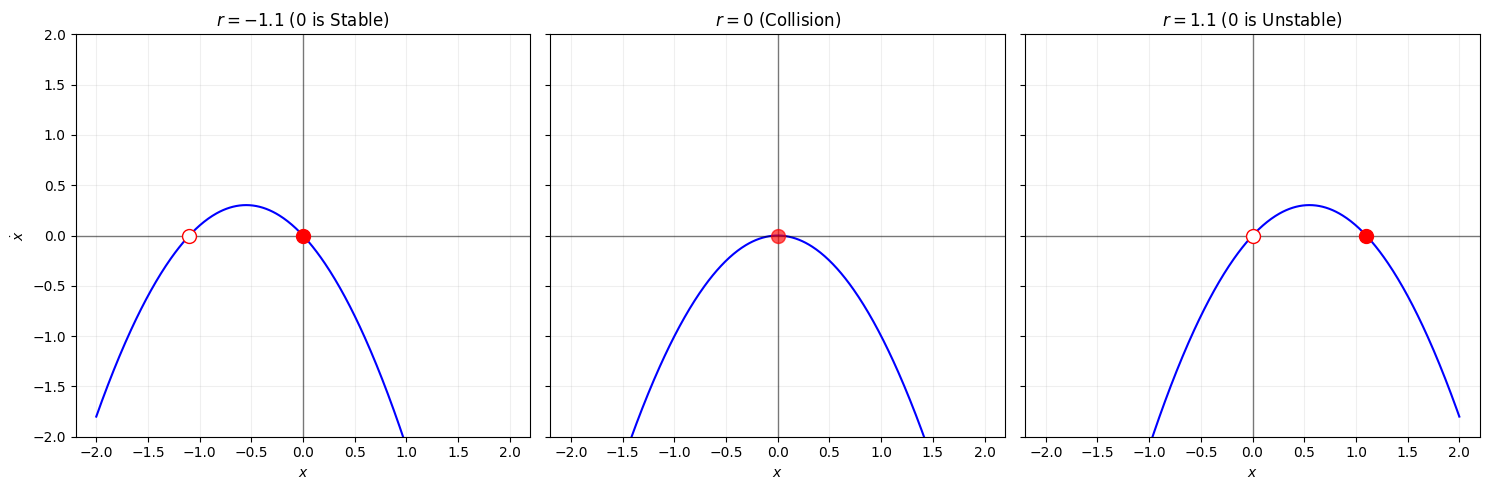

In [4]:
def f_trans(x,r):
    return r*x - x**2

x = np.linspace(-2, 2, 500)
r_values = [-1.1, 0, 1.1]
titles = [r'$r = -1.1$ (0 is Stable)', 
          r'$r = 0$ (Collision)', 
          r'$r = 1.1$ (0 is Unstable)']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, r in enumerate(r_values):
    y = f_trans(x, r)
    ax = axes[i]
    
    ax.plot(x, y, color='blue')
    ax.axhline(0, color='black', lw=1, alpha=0.5)
    ax.axvline(0,color='black',lw=1,alpha=0.5)
    
    # Points at 0 and r
    pts = [0, r]
    for p in pts:
        slope = r - 2*p
        if slope < 0:
            ax.plot(p, 0, 'ro', ms=10) # Stable
        elif slope > 0:
            ax.plot(p, 0, 'ro', ms=10, mfc='w') # Unstable
        else:
            ax.plot(p, 0, 'ro', ms=10, alpha=0.4) # Bifurcation

    ax.set_title(titles[i])
    ax.set_xlabel('$x$')
    if i == 0: ax.set_ylabel(r'$\dot{x}$')
    ax.grid(alpha=0.2)
    ax.set_ylim(-2, 2)

plt.tight_layout()
plt.show()

In [5]:
def simulate_trans(r):
    dt = 0.01
    t_max = 10
    t = np.arange(0, t_max, dt)
    initial_conditions = [-1.5, -0.5, 0.5, 1.5]
    
    plt.figure(figsize=(10, 6))
    
    for x0 in initial_conditions:
        x_values = [x0]
        current_x = x0
        for _ in range(len(t) - 1):
            dxdt = r*current_x - current_x**2
            current_x = current_x + dxdt * dt
            if abs(current_x) > 10: break
            x_values.append(current_x)
        plt.plot(t[:len(x_values)], x_values, label=f'x(0) = {x0}')

    plt.axhline(y=0, color='blue', ls='--', alpha=0.4, label='x=0')
    plt.axhline(y=r, color='orange', ls='--', alpha=0.4, label=f'x=r ({r})')

    plt.title(fr'Transcritical Trajectories: $\dot{{x}} = {r}x - x^2$')
    plt.xlabel('Time (t)')
    plt.ylabel('x(t)')
    plt.ylim(-2, 2)
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.show()

interact(simulate_trans, r=FloatSlider(value=1.1, min=-1.1, max=1.1, step=0.1));

interactive(children=(FloatSlider(value=1.1, description='r', max=1.1, min=-1.1), Output()), _dom_classes=('wi…

###  Observations and Conclusion for Part (b)

#### Asymptotic Behavior and Exchange of Stability
The simulation of the system $\dot{x} = rx - x^2$ illustrates the unique characteristics of a **Transcritical Bifurcation**:

1. **For $r < 0$:**
   * The fixed point at **$x = 0$** is the attractor (stable). All trajectories starting near the origin (between $r$ and $\infty$) converge to zero.
   * The fixed point at **$x = r$** acts as the repeller (unstable).

2. **For $r = 0$:**
   * The two fixed points collide at the origin. 
   * This is the moment of exchange; the system becomes temporarily semi-stable as the two points merge into one.

3. **For $r > 0$:**
   * The fixed point at **$x = 0$** has now become the repeller (unstable). Trajectories starting even slightly above zero move away from it.
   * The fixed point at **$x = r$** has now become the attractor (stable). Trajectories now converge to this non-zero equilibrium.

### Conclusion
A **Transcritical Bifurcation** is characterized by fixed points that persist for all parameter values but swap their stability properties as they pass through one another. Physically, this often represents systems where a "zero" state (like a population or an inactive machine) exists but becomes unstable when a growth parameter $r$ becomes positive, leading the system to settle into a new, stable, non-zero state.